**PROBLEM STATEMENT: PREDICT CESSATION IN SMOKERS**

<font size="3">
Smoking is a well-established cause of various health issues and is a leading contributor to preventable diseases and deaths worldwide. It is projected that smoking-related deaths will reach 10 million by 2030. Efforts have been made to help people quit smoking, but success rates are relatively low, partly due to the complexity of factors influencing smoking cessation.</font>

<font size="3">To improve the effectiveness of smoking cessation, let us use ML to predict better. Our aim is to create a model that can predict an individual's smoking status using bio-signals. This model would consider various factors such as nicotine dependence, carbon monoxide levels, daily cigarette consumption, age of smoking initiation, previous quit attempts, emotional well-being, personality traits, and motivation to quit. By developing such a predictive model, healthcare professionals and patients can better understand the likelihood of successfully quitting smoking. This approach holds promise for improving smoking cessation outcomes.</font>

**Data Description:**

1. Age (5-year gap)
2. Height (cm)
3. Weight (kg)
4. Waist circumference (cm)
5. Eyesight (left)
6. Eyesight (right)
7. Hearing (left)
8. Hearing (right)
9. Systolic blood pressure
10. Diastolic blood pressure (relaxation)
11. Fasting blood sugar
12. Total Cholesterol
13. Triglyceride
14. HDL cholesterol
15. LDL cholesterol
16. Hemoglobin
17. Urine protein
18. Serum creatinine
19. AST (glutamic oxaloacetic transaminase)
20. ALT (glutamic oxaloacetic transaminase)
21. GTP (γ-GTP)
22. Dental caries
23. Smoking status

**Metric of Evalutaion:** ROC-AUC

# IMPORTS

In [1]:
import sklearn
import numpy as np
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from prettytable import PrettyTable
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
from tqdm import tqdm
from tqdm.notebook import tqdm as tqdm_notebook
tqdm_notebook.get_lock().locks = []
# !pip install sweetviz
# import sweetviz as sv
import concurrent.futures
from copy import deepcopy       
from functools import partial
from itertools import combinations
import random
from random import randint, uniform
import gc
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler,PowerTransformer, FunctionTransformer
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from itertools import combinations
from sklearn.impute import SimpleImputer
import xgboost as xg
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,mean_squared_log_error, roc_auc_score, accuracy_score, f1_score, precision_recall_curve, log_loss
from sklearn.cluster import KMeans
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
!pip install gap-stat
from gap_statistic.optimalK import OptimalK
from scipy import stats
import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import boxcox
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.base import BaseEstimator, TransformerMixin
!pip install optuna
import optuna
import xgboost as xgb
!pip install catboost
!pip install lightgbm --install-option=--gpu --install-option="--boost-root=C:/local/boost_1_69_0" --install-option="--boost-librarydir=C:/local/boost_1_69_0/lib64-msvc-14.1"
import lightgbm as lgb
!pip install category_encoders
from category_encoders import OneHotEncoder, OrdinalEncoder, CountEncoder, CatBoostEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier,ExtraTreesClassifier, AdaBoostClassifier
!pip install -U imbalanced-learn
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoost, CatBoostRegressor, CatBoostClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from catboost import Pool
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option('display.max_columns',None)

  Installing build dependencies ... - \ | / - \ done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6133 sha256=b66aea38fc6fa179be7bab9638675b52c88c636b661ad56a5edd61501333e7e9
  Stored in directory: /root/.cache/pip/wheels/e6/75/de/ee29b366258cdeccdacaff94d895b9d2ffc95a486f3b982441
Successfully built gap-stat

Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --install-option


/opt/conda/lib/python3.10/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


## 2.1 Data

In [2]:
global device
device = 'cpu'


train=pd.read_csv('/kaggle/input/playground-series-s3e24/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')
original=pd.read_csv("/kaggle/input/smoker-status-prediction-using-biosignals/train_dataset.csv")

train.drop(columns=["id"],inplace=True)
test.drop(columns=["id"],inplace=True)

train_copy=train.copy()
test_copy=test.copy()
original_copy=original.copy()

original["original"]=1

train["original"]=0
test["original"]=0

train=pd.concat([train,original],axis=0)
train.reset_index(inplace=True,drop=True)
train.head()

age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
0   55         165          60       81.0             0.5              0.6   
1   70         165          65       89.0             0.6              0.7   
2   20         170          75       81.0             0.4              0.5   
3   35         180          95      105.0             1.5              1.2   
4   30         165          60       80.5             1.5              1.0   

   hearing(left)  hearing(right)  systolic  relaxation  fasting blood sugar  \
0              1               1       135          87                   94   
1              2               2       146          83                  147   
2              1               1       118          75                   79   
3              1               1       131          88                   91   
4              1               1       121          76                   91   

   Cholesterol  triglyceride  HDL  LDL  hemoglobin  Urine protein  \
0          172           300   40   75        16.5              1   
1          194            55   57  126        16.2              1   
2          178           197   45   93        17.4              1   
3          180           203   38  102        15.9              1   
4          155            87   44   93        15.4              1   

   serum creatinine  AST  ALT  Gtp  dental caries  smoking  original  
0               1.0   22   25   27              0        1         0  
1               1.1   27   23   37              1        0         0  
2               0.8   27   31   53              0        1         0  
3               1.0   20   27   30              1        0         0  
4               0.8   19   13   17              0        1         0

## Missing Values

In [3]:
table = PrettyTable()

table.field_names = ['Feature', 'Data Type', 'Train Missing %', 'Test Missing %',"Original Missing%"]
for column in train_copy.columns:
    data_type = str(train_copy[column].dtype)
    non_null_count_train= np.round(100-train_copy[column].count()/train_copy.shape[0]*100,1)
    if column!='smoking':
        non_null_count_test = np.round(100-test_copy[column].count()/test_copy.shape[0]*100,1)
    else:
        non_null_count_test="NA"
    non_null_count_orig= np.round(100-original_copy[column].count()/original_copy.shape[0]*100,1)
    table.add_row([column, data_type, non_null_count_train,non_null_count_test,non_null_count_orig])
print(table)


+---------------------+-----------+-----------------+----------------+-------------------+
|       Feature       | Data Type | Train Missing % | Test Missing % | Original Missing% |
+---------------------+-----------+-----------------+----------------+-------------------+
|         age         |   int64   |       0.0       |      0.0       |        0.0        |
|      height(cm)     |   int64   |       0.0       |      0.0       |        0.0        |
|      weight(kg)     |   int64   |       0.0       |      0.0       |        0.0        |
|      waist(cm)      |  float64  |       0.0       |      0.0       |        0.0        |
|    eyesight(left)   |  float64  |       0.0       |      0.0       |        0.0        |
|   eyesight(right)   |  float64  |       0.0       |      0.0       |        0.0        |
|    hearing(left)    |   int64   |       0.0       |      0.0       |        0.0        |
|    hearing(right)   |   int64   |       0.0       |      0.0       |        0.0        |

<font size='3'>We don't have any missing values in any of the datasets</font>

# 3. EXPLORATORY DATA ANALYSIS

## 3.1 Target Distribution

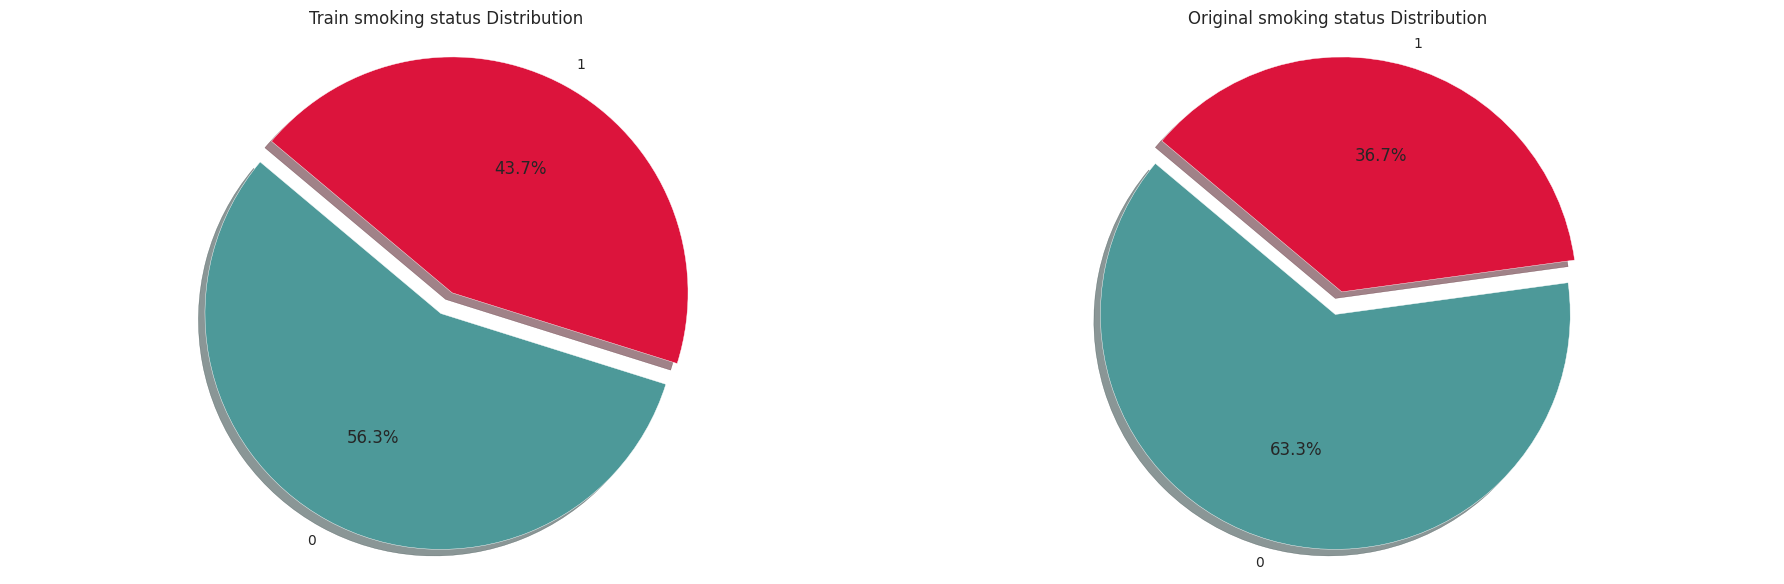

In [4]:
def plot_pie_chart(data, title, ax):
    data_counts = data['smoking'].value_counts()
    labels = data_counts.index
    sizes = data_counts.values
    colors = [ (0.3, 0.6, 0.6), 'crimson']  
    explode = (0.1, 0)  

    ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    ax.axis('equal') 
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Create three subplots in a row

plot_pie_chart(train_copy, "Train smoking status Distribution", axes[0])
plot_pie_chart(original, "Original smoking status Distribution", axes[1])

plt.tight_layout()
plt.show()


<font size="3">The smoking status distribution is similar</font>

## 3.2 Numerical Feature Distributions

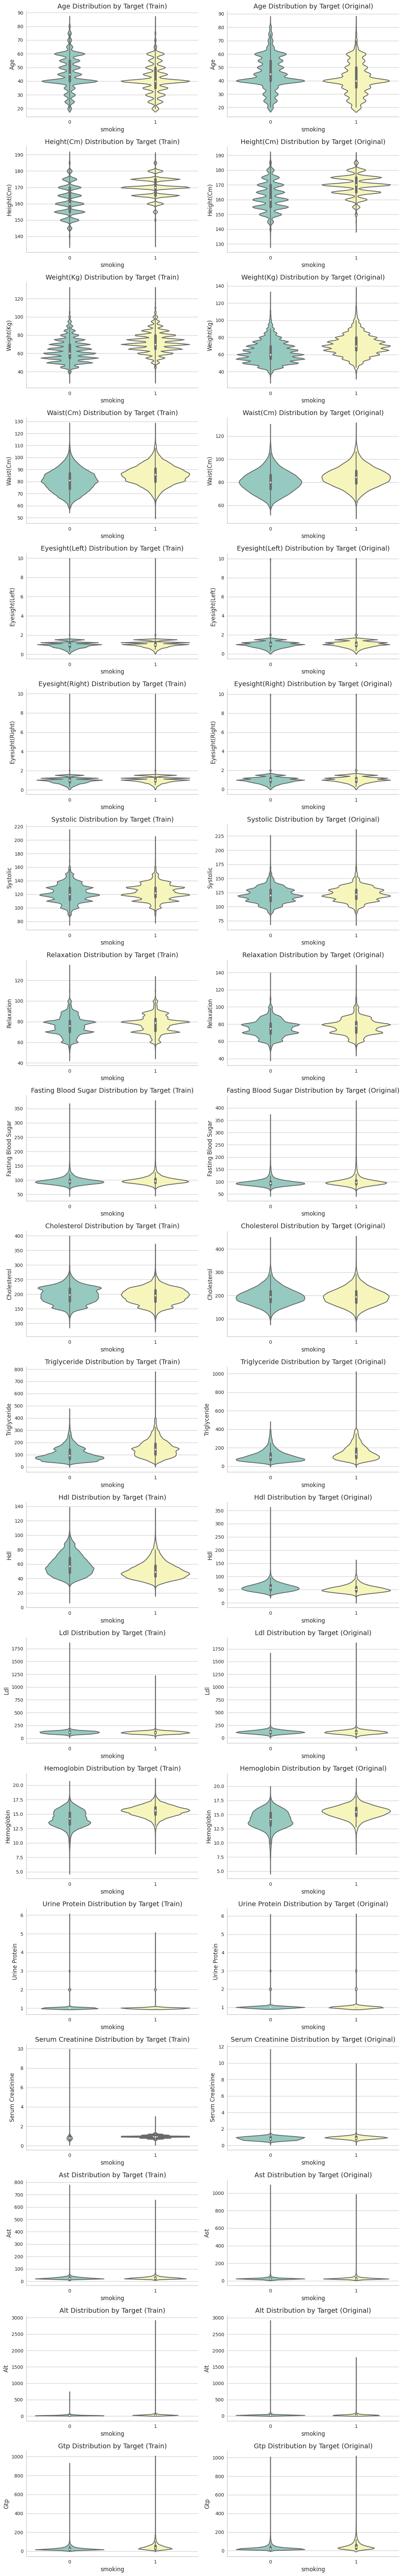

In [5]:
cont_cols = [f for f in train.columns if train[f].dtype != 'O' and train[f].nunique() > 2]
n_rows = len(cont_cols)
fig, axs = plt.subplots(n_rows, 2, figsize=(12, 4 * n_rows))
sns.set_palette("Set3")
for i, col in enumerate(cont_cols):
    sns.violinplot(x='smoking', y=col, data=train_copy, ax=axs[i, 0])
    axs[i, 0].set_title(f'{col.title()} Distribution by Target (Train)', fontsize=14)
    axs[i, 0].set_xlabel('smoking', fontsize=12)
    axs[i, 0].set_ylabel(col.title(), fontsize=12)
    sns.despine()

    sns.violinplot(x='smoking', y=col, data=original, ax=axs[i, 1])
    axs[i, 1].set_title(f'{col.title()} Distribution by Target (Original)', fontsize=14)
    axs[i, 1].set_xlabel('smoking', fontsize=12)
    axs[i, 1].set_ylabel(col.title(), fontsize=12)
    sns.despine()

fig.tight_layout()

plt.show()

**INFERENCES**
1. <font size="3">Very interesting spike shaped distribution for height, weight, & age. I think the numbers are rounded or maybe experimental error that lead to numbers being close to 5</font>
2. <font size="3">Serum creatinine looks like distingusing feature atleast in the train dataset</font>

  ## Numerical Pair Plots - Original

<Figure size 1800x1000 with 0 Axes>

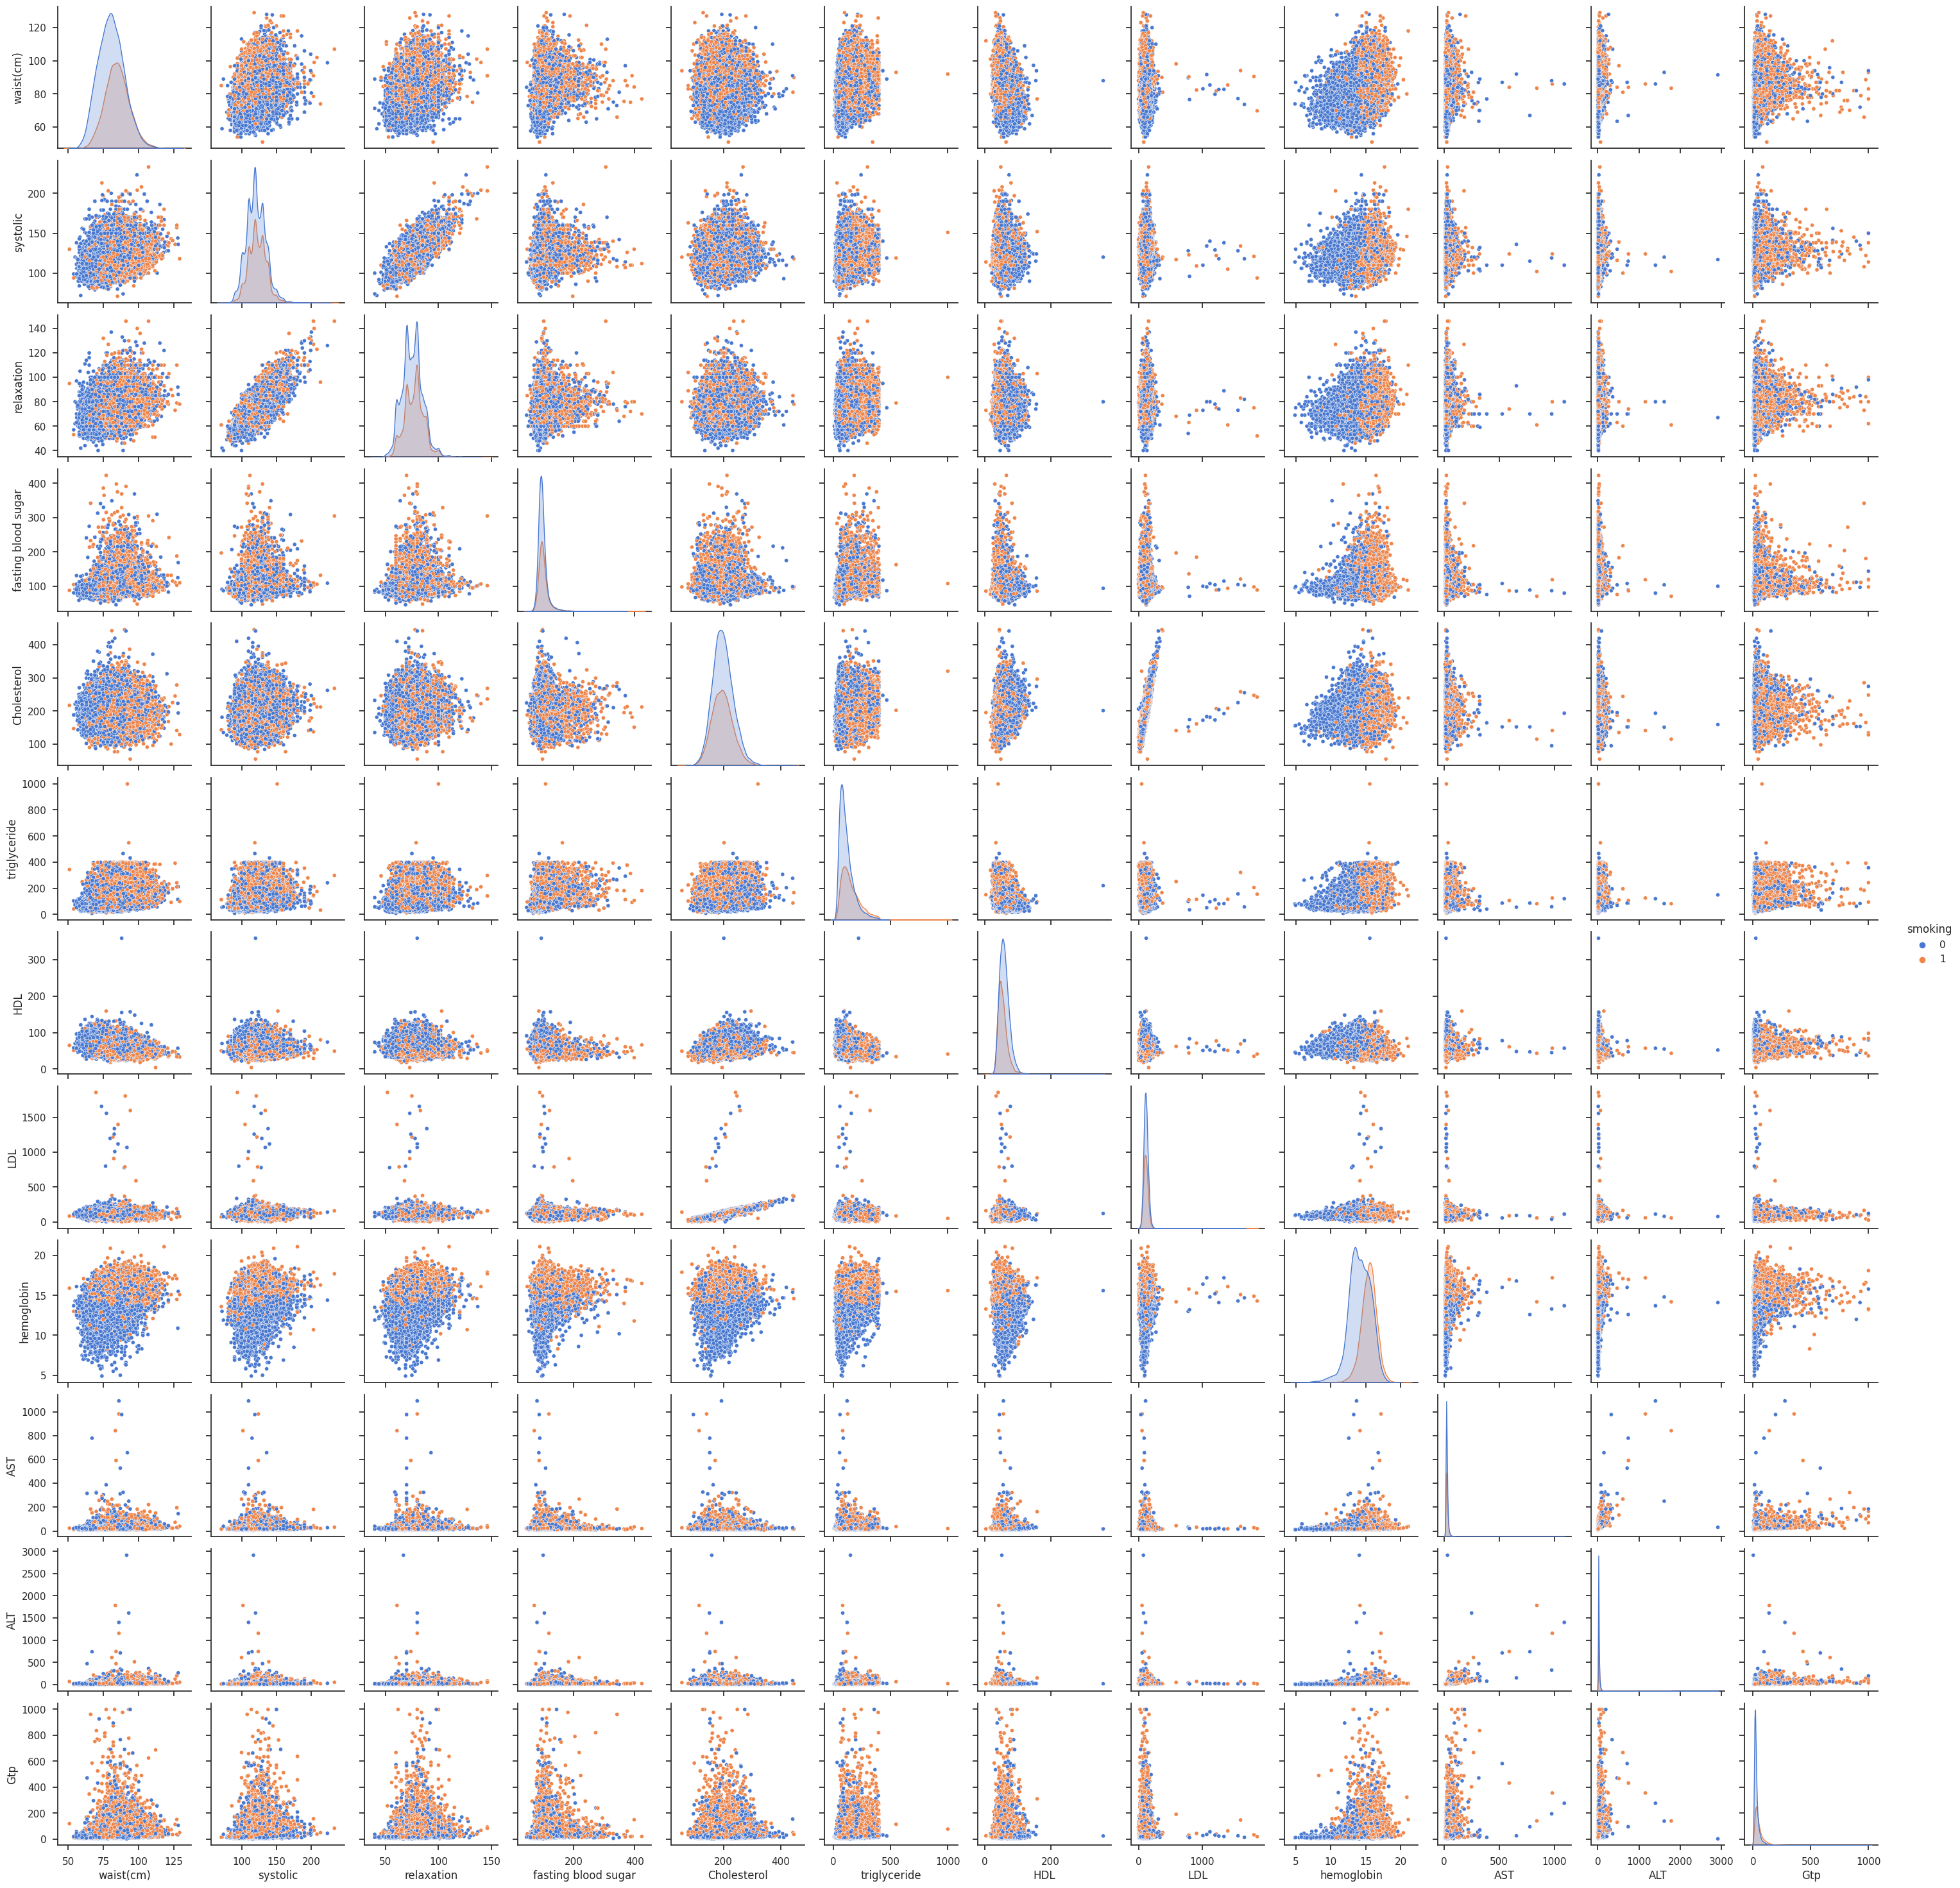

In [6]:
pair_plot_cols=[f for f in cont_cols if original[f].nunique()>50]

sns.set(font_scale=1)
plt.figure(figsize=(18, 10))
sns.set(style="ticks", color_codes=True)
sns.pairplot(data=original, vars=pair_plot_cols,diag_kind='kde', 
        kind='scatter', palette='muted', 
        plot_kws={'s': 20}, hue='smoking')
plt.show()

**INFERENCES:**
1. <font size="3">Hemoglobin couppled with Waist, Systolic, Relaxation, Fasting Blood Sugar, Cholestrol,triglyceride, & HDL.</font>

# FEATURE ENGINEERING

## Data Preprocessing

<font size="3">The data processing ideas are referenced from [@paddykb](https://www.kaggle.com/code/paddykb/pg-s3e24-brute-force-and-ignorance)</font>

In [7]:
def create_extra_features(df):
    best = np.where(df['hearing(left)'] < df['hearing(right)'], 
                    df['hearing(left)'],  df['hearing(right)'])
    worst = np.where(df['hearing(left)'] < df['hearing(right)'], 
                     df['hearing(right)'],  df['hearing(left)'])
    df['hearing(left)'] = best - 1
    df['hearing(right)'] = worst - 1
    
    df['eyesight(left)'] = np.where(df['eyesight(left)'] > 9, 0, df['eyesight(left)'])
    df['eyesight(right)'] = np.where(df['eyesight(right)'] > 9, 0, df['eyesight(right)'])
    best = np.where(df['eyesight(left)'] < df['eyesight(right)'], 
                    df['eyesight(left)'],  df['eyesight(right)'])
    worst = np.where(df['eyesight(left)'] < df['eyesight(right)'], 
                     df['eyesight(right)'],  df['eyesight(left)'])
    df['eyesight(left)'] = best
    df['eyesight(right)'] = worst
    ##
    df['Gtp'] = np.clip(df['Gtp'], 0, 300)
    df['HDL'] = np.clip(df['HDL'], 0, 110)
    df['LDL'] = np.clip(df['LDL'], 0, 200)
    df['ALT'] = np.clip(df['ALT'], 0, 150)
    df['AST'] = np.clip(df['AST'], 0, 100)
    df['serum creatinine'] = np.clip(df['serum creatinine'], 0, 3)  
    
    return df
train=create_extra_features(train)
test=create_extra_features(test)

### Basic Functions

In [8]:
def min_max_scaler(train, test, column):
    
    sc=MinMaxScaler()
    
    max_val=max(train[column].max(),test[column].max())
    min_val=min(train[column].min(),test[column].min())

    train[column]=(train[column]-min_val)/(max_val-min_val)
    test[column]=(test[column]-min_val)/(max_val-min_val)
    
    return train,test  

def OHE(train_df,test_df,cols,target):
    
    combined = pd.concat([train_df, test_df], axis=0)
    for col in cols:
        one_hot = pd.get_dummies(combined[col])
        counts = combined[col].value_counts()
        min_count_category = counts.idxmin()
        one_hot = one_hot.drop(min_count_category, axis=1)
        one_hot.columns=[str(f)+col+"_OHE" for f in one_hot.columns]
        combined = pd.concat([combined, one_hot], axis="columns")
        combined = combined.loc[:, ~combined.columns.duplicated()]
    
    # split back to train and test dataframes
    train_ohe = combined[:len(train_df)]
    test_ohe = combined[len(train_df):]
    test_ohe.reset_index(inplace=True,drop=True)
    test_ohe.drop(columns=[target],inplace=True)
    return train_ohe, test_ohe

lgb_params = {
            'n_estimators': 100,
            'max_depth': 6,
            "num_leaves": 16,
            'learning_rate': 0.05,
            'subsample': 0.7,
            'colsample_bytree': 0.8,
            'reg_lambda': 5e-07,
            'objective': 'regression_l2',
            'metric': 'mean_squared_error',
            'boosting_type': 'gbdt',
            'random_state': 42,
            'device': device,
        }
def rmse(y1,y2):
    return(np.sqrt(mean_squared_error(np.array(y1),np.array(y2))))

def store_missing_rows(df, features):
    missing_rows = {}
    
    for feature in features:
        missing_rows[feature] = df[df[feature].isnull()]
    
    return missing_rows

def fill_missing_numerical(train,test,target, max_iterations=10):
    train_temp=train.copy()
    if target in train_temp.columns:
        train_temp=train_temp.drop(columns=target)
        
    
    df=pd.concat([train_temp,test],axis="rows")
    df=df.reset_index(drop=True)
    features=[ f for f in df.columns if df[f].isna().sum()>0]
    if len(features)>0:
        missing_rows = store_missing_rows(df, features)
        
        for f in features:
            df[f]=df[f].fillna(df[f].mean())

        cat_features=[f for f in df.columns if not pd.api.types.is_numeric_dtype(df[f])]
        dictionary = {feature: [] for feature in features}

        for iteration in tqdm(range(max_iterations), desc="Iterations"):
            for feature in features:
                rows_miss = missing_rows[feature].index

                missing_temp = df.loc[rows_miss].copy()
                non_missing_temp = df.drop(index=rows_miss).copy()
                y_pred_prev=missing_temp[feature]
                missing_temp = missing_temp.drop(columns=[feature])
                
                X_train = non_missing_temp.drop(columns=[feature])
                y_train = non_missing_temp[[feature]]

                model= lgb.LGBMRegressor(**lgb_params)
                model.fit(X_train, y_train, verbose=False)
                
                y_pred = model.predict(missing_temp)
                df.loc[rows_miss, feature] = y_pred
                error_minimize=rmse(y_pred,y_pred_prev)
                dictionary[feature].append(error_minimize)

        for feature, values in dictionary.items():
            iterations = range(1, len(values) + 1)  # x-axis values (iterations)
            plt.plot(iterations, values, label=feature)  # plot the values
            plt.xlabel('Iterations')
            plt.ylabel('RMSE')
            plt.title('Minimization of RMSE with iterations')
            plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()
        train[features] = np.array(df.iloc[:train.shape[0]][features])
        test[features] = np.array(df.iloc[train.shape[0]:][features])

    return train,test

# Numerical Transformations

Iterations: 100%|██████████| 5/5 [00:16<00:00,  3.23s/it]


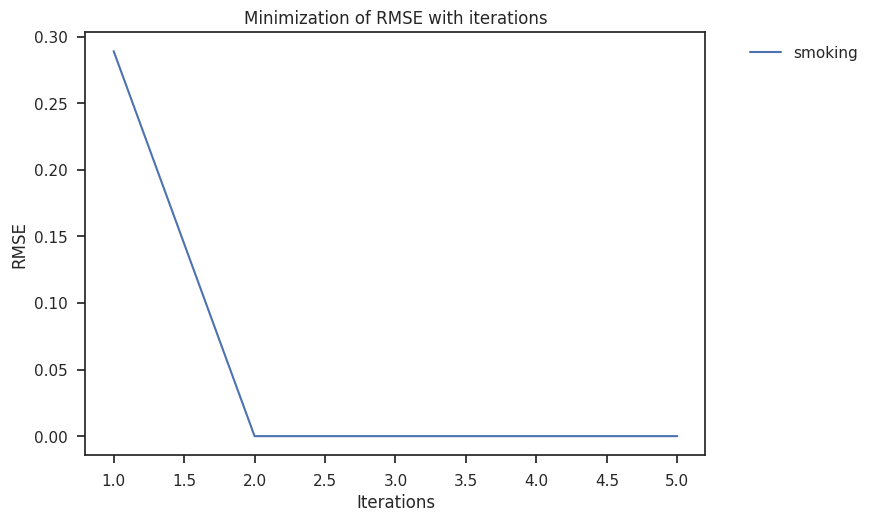

+---------------------+--------------------+---------------------+--------------------+
|       Feature       |  Initial ROC_AUC   |    Transformation   | Tranformed ROC_AUC |
+---------------------+--------------------+---------------------+--------------------+
|      waist(cm)      | 0.6505722716496287 |      waist(cm)      | 0.6505722716496287 |
|       systolic      | 0.5390385037787164 |       systolic      | 0.5390385037787164 |
|      relaxation     | 0.5664295673697634 |      relaxation     | 0.5664295673697634 |
| fasting blood sugar | 0.5650914936753177 | fasting blood sugar | 0.5650914936753177 |
|     Cholesterol     | 0.526275134489828  |     Cholesterol     | 0.526275134489828  |
|     triglyceride    | 0.6940685576334167 |     triglyceride    | 0.6940685576334167 |
|         HDL         | 0.6519100845422721 |         HDL         | 0.6519100845422721 |
|         LDL         | 0.5398187849130585 |         LDL         | 0.5398187849130585 |
|      hemoglobin     | 0.763336

In [9]:
cont_cols = [f for f in train.columns if pd.api.types.is_numeric_dtype(train[f]) and train[f].nunique() >50]
cat_cols = [f for f in train.columns if train[f].nunique()!=2and f not in ['smoking']]

sc=MinMaxScaler()

global unimportant_features
global overall_best_score
global overall_best_col
unimportant_features=[]
overall_best_score=0
overall_best_col='none'

for col in cont_cols:
     train, test=min_max_scaler(train, test, col)

def transformer(train, test,cont_cols, target):
    '''
    Algorithm applies multiples transformations on selected columns and finds the best transformation using a single variable model performance
    '''
    global unimportant_features
    global overall_best_score
    global overall_best_col
    train_copy = train.copy()
    test_copy = test.copy()
    table = PrettyTable()
    table.field_names = ['Feature', 'Initial ROC_AUC', 'Transformation', 'Tranformed ROC_AUC']

    for col in cont_cols:
        
        for c in ["log_"+col, "sqrt_"+col, "bx_cx_"+col, "y_J_"+col, "log_sqrt"+col, "pow_"+col, "pow2_"+col]:
            if c in train_copy.columns:
                train_copy = train_copy.drop(columns=[c])
        
        # Log Transformation after MinMax Scaling (keeps data between 0 and 1)
        train_copy["log_"+col] = np.log1p(train_copy[col])
        test_copy["log_"+col] = np.log1p(test_copy[col])
        
        # Square Root Transformation
        train_copy["sqrt_"+col] = np.sqrt(train_copy[col])
        test_copy["sqrt_"+col] = np.sqrt(test_copy[col])
        
        # Box-Cox transformation
        combined_data = pd.concat([train_copy[[col]], test_copy[[col]]], axis=0)
        epsilon = 1e-5
        transformer = PowerTransformer(method='box-cox')
        scaled_data = transformer.fit_transform(combined_data + epsilon)

        train_copy["bx_cx_" + col] = scaled_data[:train_copy.shape[0]]
        test_copy["bx_cx_" + col] = scaled_data[train_copy.shape[0]:]
        # Yeo-Johnson transformation
        transformer = PowerTransformer(method='yeo-johnson')
        train_copy["y_J_"+col] = transformer.fit_transform(train_copy[[col]])
        test_copy["y_J_"+col] = transformer.transform(test_copy[[col]])
        
        # Power transformation, 0.25
        power_transform = lambda x: np.power(x + 1 - np.min(x), 0.25)
        transformer = FunctionTransformer(power_transform)
        train_copy["pow_"+col] = transformer.fit_transform(train_copy[[col]])
        test_copy["pow_"+col] = transformer.transform(test_copy[[col]])
        
        # Power transformation, 2
        power_transform = lambda x: np.power(x + 1 - np.min(x), 2)
        transformer = FunctionTransformer(power_transform)
        train_copy["pow2_"+col] = transformer.fit_transform(train_copy[[col]])
        test_copy["pow2_"+col] = transformer.transform(test_copy[[col]])
        
        # Log to power transformation
        train_copy["log_sqrt"+col] = np.log1p(train_copy["sqrt_"+col])
        test_copy["log_sqrt"+col] = np.log1p(test_copy["sqrt_"+col])
        
        temp_cols = [col, "log_"+col, "sqrt_"+col, "bx_cx_"+col, "y_J_"+col,  "pow_"+col , "pow2_"+col,"log_sqrt"+col]
        
        train_copy,test_copy = fill_missing_numerical(train_copy,test_copy,"defects",5)
        
        pca = TruncatedSVD(n_components=1)
        x_pca_train = pca.fit_transform(train_copy[temp_cols])
        x_pca_test = pca.transform(test_copy[temp_cols])
        x_pca_train = pd.DataFrame(x_pca_train, columns=[col+"_pca_comb"])
        x_pca_test = pd.DataFrame(x_pca_test, columns=[col+"_pca_comb"])
        temp_cols.append(col+"_pca_comb")
        
        test_copy = test_copy.reset_index(drop=True)
        
        train_copy = pd.concat([train_copy, x_pca_train], axis='columns')
        test_copy = pd.concat([test_copy, x_pca_test], axis='columns')
        
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        
        auc_scores = []
        
        for f in temp_cols:
            X = train_copy[[f]].values
            y = train_copy[target].values
            
            auc = []
            for train_idx, val_idx in kf.split(X, y):
                X_train, y_train = X[train_idx], y[train_idx]
                x_val, y_val = X[val_idx], y[val_idx]
                model =   LogisticRegression()
                model.fit(X_train,y_train)
                y_pred = model.predict_proba(x_val)[:,1]
                auc.append(roc_auc_score(y_val, y_pred))
            auc_scores.append((f, np.mean(auc)))
            
            if overall_best_score < np.mean(auc):
                overall_best_score = np.mean(auc)
                overall_best_col = f

            if f == col:
                orig_auc = np.mean(auc)
                
        best_col, best_auc = sorted(auc_scores, key=lambda x: x[1], reverse=True)[0]
        cols_to_drop = [f for f in temp_cols if f != best_col]
        final_selection = [f for f in temp_cols if f not in cols_to_drop]
        
        if cols_to_drop:
            unimportant_features = unimportant_features+cols_to_drop
        table.add_row([col,orig_auc,best_col ,best_auc])
    print(table)   
    print("overall best CV ROC AUC score: ",overall_best_score)
    return train_copy, test_copy

train, test= transformer(train, test,cont_cols, "smoking")


# 4.2 Discrete Feature-->Categorical

In [10]:
selected_cols=[]
for col in cat_cols:
    train['cat_'+col]=train[col]
    test['cat_'+col]=test[col]
    selected_cols.append('cat_'+col)

cat_age
cat_height(cm)
cat_weight(kg)
cat_waist(cm)
cat_eyesight(left)
cat_eyesight(right)
cat_systolic
cat_relaxation
cat_fasting blood sugar
cat_Cholesterol
cat_triglyceride
cat_HDL
cat_LDL
cat_hemoglobin
cat_Urine protein
cat_serum creatinine
cat_AST
cat_ALT
cat_Gtp
+-------------------------+-------------------------------------+--------------------+
|         Feature         |           Encoded Feature           |   ROC AUC Score    |
+-------------------------+-------------------------------------+--------------------+
|         cat_age         |            cat_age_count            | 0.6188847857878939 |
|      cat_height(cm)     |         cat_height(cm)_count        | 0.7537599609566815 |
|      cat_weight(kg)     |         cat_weight(kg)_count        | 0.707551244269746  |
|      cat_waist(cm)      |         cat_waist(cm)_count         | 0.6419657415025325 |
|    cat_eyesight(left)   |       cat_eyesight(left)_count      | 0.578934416505231  |
|   cat_eyesight(right)   |      c

Iterations: 100%|██████████| 3/3 [07:55<00:00, 158.43s/it]


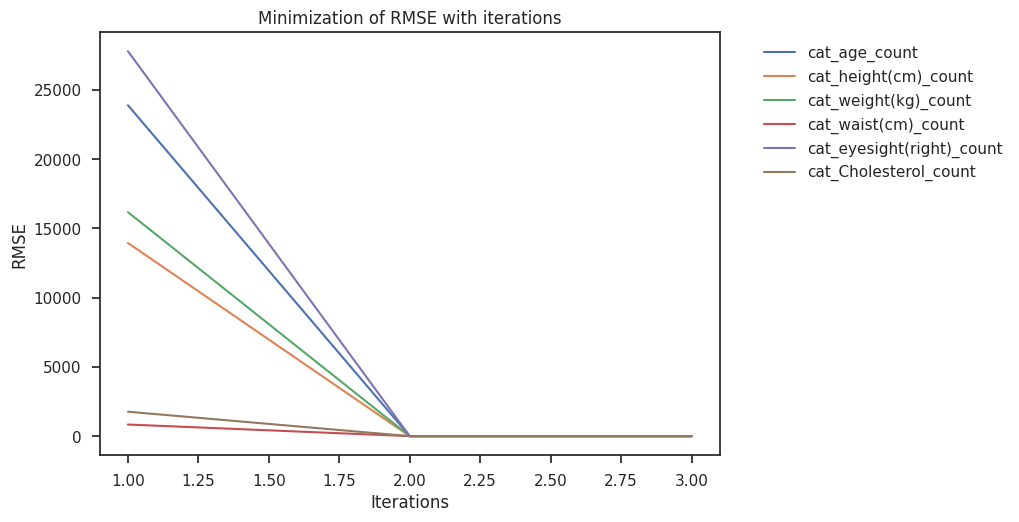

In [11]:
def high_freq_ohe(train, test, extra_cols, target, n_limit=50):
    
    train_copy=train.copy()
    test_copy=test.copy()
    ohe_cols=[]
    for col in extra_cols:
        dict1=train_copy[col].value_counts().to_dict()
        ordered=dict(sorted(dict1.items(), key=lambda x: x[1], reverse=True))
        rare_keys=list([*ordered.keys()][n_limit:])
        rare_key_map=dict(zip(rare_keys, np.full(len(rare_keys),9999)))
        
        train_copy[col]=train_copy[col].replace(rare_key_map)
        test_copy[col]=test_copy[col].replace(rare_key_map)
    train_copy, test_copy = OHE(train_copy, test_copy, extra_cols, target)
    drop_cols=[f for f in train_copy.columns if "9999" in f or train_copy[f].nunique()==1]
    train_copy=train_copy.drop(columns=drop_cols)
    test_copy=test_copy.drop(columns=drop_cols)
    
    return train_copy, test_copy

def cat_encoding(train, test,cat_cols, target):
   
    global overall_best_score
    global overall_best_col
    table = PrettyTable()
    table.field_names = ['Feature', 'Encoded Feature', 'ROC AUC Score']
    train_copy=train.copy()
    test_copy=test.copy()
    train_dum = train.copy()
    for feature in cat_cols:
        
        dic = train_copy[feature].value_counts().to_dict()
        train_copy[feature + "_count"] =train_copy[feature].map(dic)
        test_copy[feature + "_count"] = test_copy[feature].map(dic)

        dic2=train_copy[feature].value_counts().to_dict()
        list1=np.arange(len(dic2.values()),0,-1)
        
        dic3=dict(zip(list(dic2.keys()),list1))
        train_copy[feature+"_count_label"]=train_copy[feature].replace(dic3).astype(float)
        test_copy[feature+"_count_label"]=test_copy[feature].replace(dic3).astype(float)

        temp_cols = [feature + "_count", feature + "_count_label"]
        if train_copy[feature].dtype=='O':
            train_copy, test_copy = OHE(train_copy, test_copy, [feature], target)
            train_copy=train_copy.drop(columns=[feature])
            test_copy=test_copy.drop(columns=[feature])
        else:
            if train_copy[feature].nunique()<=50:
                train_copy[feature]=train_copy[feature].astype(str)+"_"+feature
                test_copy[feature]=test_copy[feature].astype(str)+"_"+feature
                train_copy, test_copy = OHE(train_copy, test_copy, [feature], target)
                train_copy=train_copy.drop(columns=[feature])
                test_copy=test_copy.drop(columns=[feature])
                
            else:
                train_copy,test_copy=high_freq_ohe(train_copy,test_copy,[feature], target, n_limit=10)
            

        kf = KFold(n_splits=5, shuffle=True, random_state=42)

        auc_scores = []

        for f in temp_cols:
            X = train_copy[[f]].values
            y = train_copy[target].astype(int).values

            auc = []
            for train_idx, val_idx in kf.split(X, y):
                X_train, y_train = X[train_idx], y[train_idx]
                x_val, y_val = X[val_idx], y[val_idx]
                model =  HistGradientBoostingClassifier (max_iter=300, learning_rate=0.02, max_depth=6, random_state=42)
                model.fit(X_train, y_train)
                y_pred = model.predict_proba(x_val)[:,1]
                auc.append(roc_auc_score(y_val,  y_pred))
            auc_scores.append((f, np.mean(auc)))
            if overall_best_score < np.mean(auc):
                overall_best_score = np.mean(auc)
                overall_best_col = f
        best_col, best_auc = sorted(auc_scores, key=lambda x: x[1], reverse=True)[0]

        corr = train_copy[temp_cols].corr(method='pearson')
        corr_with_best_col = corr[best_col]
        cols_to_drop = [f for f in temp_cols if corr_with_best_col[f] > 0.5 and f != best_col]
        final_selection = [f for f in temp_cols if f not in cols_to_drop]
        if cols_to_drop:
            train_copy = train_copy.drop(columns=cols_to_drop)
            test_copy = test_copy.drop(columns=cols_to_drop)

        table.add_row([feature, best_col, best_auc])
        print(feature)
    print(table)
    print("overall best CV score: ", overall_best_score)
    return train_copy, test_copy

train, test= cat_encoding(train, test,selected_cols, "smoking")
train, test = fill_missing_numerical(train, test,"smoking",3)

# Arithmetic New Features

In [12]:
def better_features(train, test, target, cols, best_score):
    new_cols = []
    skf = KFold(n_splits=5, shuffle=True, random_state=42)
    best_list=[]
    for i in tqdm(range(len(cols)), desc='Generating Columns'):
        col1 = cols[i]
        temp_df = pd.DataFrame()  
        temp_df_test = pd.DataFrame()

        for j in range(i+1, len(cols)):
            col2 = cols[j]
           
            temp_df[col1 + '*' + col2] = train[col1] * train[col2]
            temp_df_test[col1 + '*' + col2] = test[col1] * test[col2]

            
            temp_df[col1 + '/' + col2] = train[col1] / (train[col2] + 1e-5)
            temp_df_test[col1 + '/' + col2] = test[col1] / (test[col2] + 1e-5)

           
            temp_df[col2 + '/' + col1] = train[col2] / (train[col1] + 1e-5)
            temp_df_test[col2 + '/' + col1] = test[col2] / (test[col1] + 1e-5)

          
            temp_df[col1 + '-' + col2] = train[col1] - train[col2]
            temp_df_test[col1 + '-' + col2] = test[col1] - test[col2]

           
            temp_df[col1 + '+' + col2] = train[col1] + train[col2]
            temp_df_test[col1 + '+' + col2] = test[col1] + test[col2]

        SCORES = []
        for column in temp_df.columns:
            scores = []
            for train_index, val_index in skf.split(train, train[target]):
                X_train, X_val = temp_df[column].iloc[train_index].values.reshape(-1, 1), temp_df[column].iloc[val_index].values.reshape(-1, 1)
                y_train, y_val = train[target].astype(int).iloc[train_index], train[target].astype(int).iloc[val_index]
                model = LogisticRegression()
                model.fit(X_train, y_train)
                y_pred = model.predict_proba(X_val)[:,1]
                score = roc_auc_score( y_val, y_pred)
                scores.append(score)
            mean_score = np.mean(scores)
            SCORES.append((column, mean_score))

        if SCORES:
            best_col, best_auc = sorted(SCORES, key=lambda x: x[1],reverse=True)[0]
            corr_with_other_cols = train.drop([target] + new_cols, axis=1).corrwith(temp_df[best_col])
            if (corr_with_other_cols.abs().max() < 0.9 or best_auc > best_score) and corr_with_other_cols.abs().max() !=1 :
                train[best_col] = temp_df[best_col]
                test[best_col] = temp_df_test[best_col]
                new_cols.append(best_col)
                print(f"Added column '{best_col}' with ROC AUC Score: {best_auc:.4f} & Correlation {corr_with_other_cols.abs().max():.4f}")

    return train, test, new_cols

<font size="3">We don't have to run the above algorithm every time, just run it once to store the combinations and compute just the required columns</font>

In [13]:
new_cols=['height(cm)*hemoglobin', 'eyesight(left)*Gtp', 'eyesight(right)*Gtp', 'Gtp/systolic', 'Gtp/Cholesterol', 'triglyceride+hemoglobin',\
          'HDL-hemoglobin', 'LDL-hemoglobin', 'hemoglobin+Gtp', 'y_J_ALT/cat_weight(kg)_count', 'cat_age_count-cat_height(cm)_count', \
          'cat_weight(kg)_count-cat_serum creatinine_count', 'cat_eyesight(left)_count/ALT_unimp_cluster_WOE', \
          'cat_Urine protein_count/cat_eyesight(right)_count', 'cat_Urine protein_count/cat_serum creatinine_count', \
          'cat_serum creatinine_count/ALT_unimp_cluster_WOE', 'waist(cm)_unimp_cluster_WOE-Gtp_unimp_cluster_WOE',\
          'systolic_unimp_cluster_WOE-Gtp_unimp_cluster_WOE', 'relaxation_unimp_cluster_WOE-Gtp_unimp_cluster_WOE',\
          'fasting blood sugar_unimp_cluster_WOE-Gtp_unimp_cluster_WOE', 'Cholesterol_unimp_cluster_WOE+Gtp_unimp_cluster_WOE',\
          'triglyceride_unimp_cluster_WOE+Gtp_unimp_cluster_WOE', 'HDL_unimp_cluster_WOE-Gtp_unimp_cluster_WOE', \
          'LDL_unimp_cluster_WOE-Gtp_unimp_cluster_WOE', 'hemoglobin_unimp_cluster_WOE+Gtp_unimp_cluster_WOE',\
          'AST_unimp_cluster_WOE-Gtp_unimp_cluster_WOE', 'Gtp_unimp_cluster_WOE/ALT_unimp_cluster_WOE']

In [14]:
def apply_arithmetic_operations(train_df, test_df, expressions_list):
    
    for expression in expressions_list:
        if expression not in train_df.columns:
            
            parts = expression.split('+') if '+' in expression else \
                    expression.split('-') if '-' in expression else \
                    expression.split('*') if '*' in expression else \
                    expression.split('/')
            
            cols = [col for col in parts]

            if cols[0] in train_df.columns and cols[1] in train_df.columns:
                if '+' in expression:
                    train_df[expression] = train_df[cols[0]] + train_df[cols[1]]
                    test_df[expression] = test_df[cols[0]] + test_df[cols[1]]
                elif '-' in expression:
                    train_df[expression] = train_df[cols[0]] - train_df[cols[1]]
                    test_df[expression] = test_df[cols[0]] - test_df[cols[1]]
                elif '*' in expression:
                    train_df[expression] = train_df[cols[0]] * train_df[cols[1]]
                    test_df[expression] = test_df[cols[0]] * test_df[cols[1]]
                elif '/' in expression:
                    train_df[expression] = train_df[cols[0]] / (train_df[cols[1]]+1e-5)
                    test_df[expression] = test_df[cols[0]] /( test_df[cols[1]]+1e-5)
    
    return train_df, test_df

train, test = apply_arithmetic_operations(train, test, new_cols)

In [15]:
first_drop=[ f for f in unimportant_features if f in train.columns]
train=train.drop(columns=first_drop)
test=test.drop(columns=first_drop)

# FEATURE SELECTION

In [16]:
final_features=[f for f in train.columns if f not in ['smoking']]
final_features=[*set(final_features)]

sc=StandardScaler()

train_scaled=train.copy()
test_scaled=test.copy()
train_scaled[final_features]=sc.fit_transform(train[final_features])
test_scaled[final_features]=sc.transform(test[final_features])

In [17]:
def post_processor(train, test):
    
    cols=[f for f in train.columns if "smoking" not in f and "OHE" not in f]
    train_cop=train.copy()
    test_cop=test.copy()
    drop_cols=[]
    for i, feature in enumerate(cols):
        for j in range(i+1, len(cols)):
            if sum(abs(train_cop[feature]-train_cop[cols[j]]))==0:
                if cols[j] not in drop_cols:
                    drop_cols.append(cols[j])
    print(drop_cols)
    train_cop.drop(columns=drop_cols,inplace=True)
    test_cop.drop(columns=drop_cols,inplace=True)
    
    return train_cop, test_cop

                    
train_cop, test_cop = post_processor(train_scaled, test_scaled)        

# train_cop.to_csv('train_processed.csv',index=False)
# test_cop.to_csv('test_processed.csv',index=False)

[]


In [18]:
X_train = train_cop.drop(columns=['smoking'])
y_train = train['smoking'].astype(int)

X_test = test_cop.copy()

print(X_train.shape, X_test.shape)

(198240, 304) (106171, 304)


In [19]:
def get_most_important_features(X_train, y_train, n,model_input):
    xgb_params = {
            'n_jobs': -1,
            'eval_metric': 'logloss',
            'objective': 'binary:logistic',
            'tree_method': 'hist',
            'verbosity': 0,
            'random_state': 42,
        }
    if device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'
    lgb_params = {
            'objective': 'binary',
            'metric': 'logloss',
            'boosting_type': 'gbdt',
            'random_state': 42,
            'device': device,
        }
    cb_params = {
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'AUC',
            'loss_function': 'Logloss',
            'random_state': 42,
            'task_type': device.upper(),
        }
    if 'xgb' in model_input:
        model = xgb.XGBClassifier(**xgb_params)
    elif 'cat' in model_input:
        model=CatBoostClassifier(**cb_params)
    else:
        model=lgb.LGBMClassifier(**lgb_params)
        
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = []
    feature_importances_list = []
    
    for train_idx, val_idx in kfold.split(X_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_train_fold, y_train_fold, verbose=False)
        
        y_pred = model.predict_proba(X_val_fold)[:,1]
        auc_scores.append(roc_auc_score(y_val_fold, y_pred))
        feature_importances = model.feature_importances_
        feature_importances_list.append(feature_importances)

    avg_auc= np.mean(auc_scores)
    avg_feature_importances = np.mean(feature_importances_list, axis=0)

    feature_importance_list = [(X_train.columns[i], importance) for i, importance in enumerate(avg_feature_importances)]
    sorted_features = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)
    top_n_features = [feature[0] for feature in sorted_features[:n]]

    display_features=top_n_features[:10]
    
    sns.set_palette("Set2")
    plt.figure(figsize=(8, 6))
    plt.barh(range(len(display_features)), [avg_feature_importances[X_train.columns.get_loc(feature)] for feature in display_features])
    plt.yticks(range(len(display_features)), display_features, fontsize=12)
    plt.xlabel('Average Feature Importance', fontsize=14)
    plt.ylabel('Features', fontsize=10)
    plt.title(f'Top {10} of {n} Feature Importances with ROC AUC score {avg_auc}', fontsize=16)
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    for index, value in enumerate([avg_feature_importances[X_train.columns.get_loc(feature)] for feature in display_features]):
        plt.text(value + 0.005, index, f'{value:.3f}', fontsize=12, va='center')

    plt.tight_layout()
    plt.show()

    return top_n_features


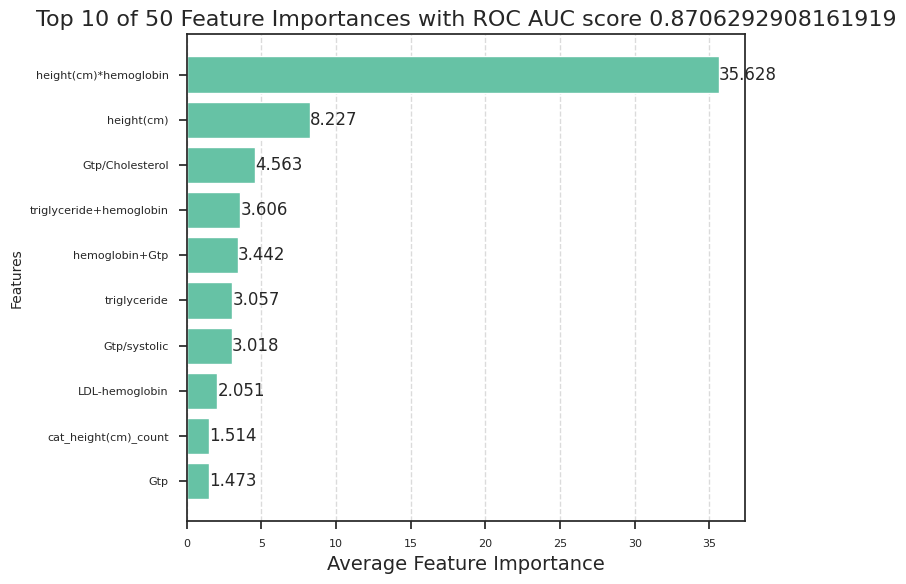

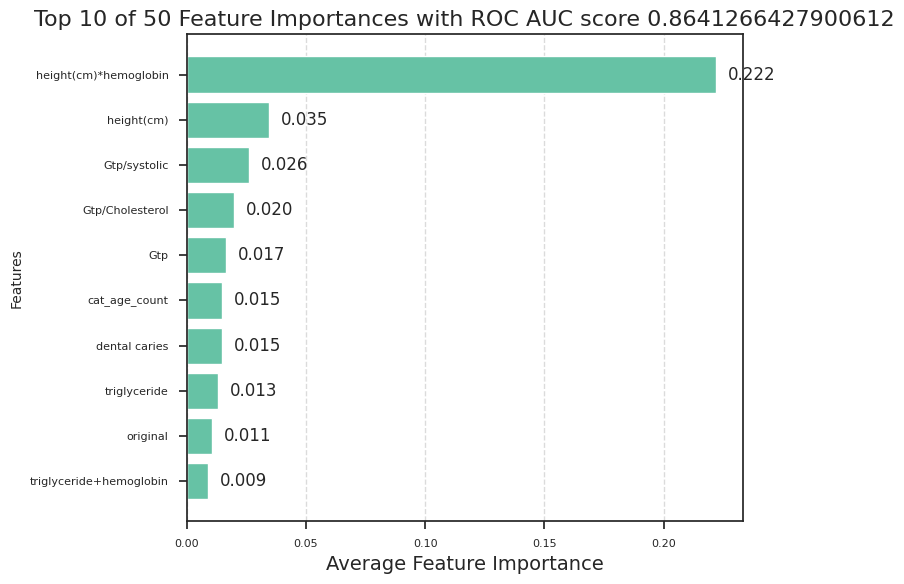

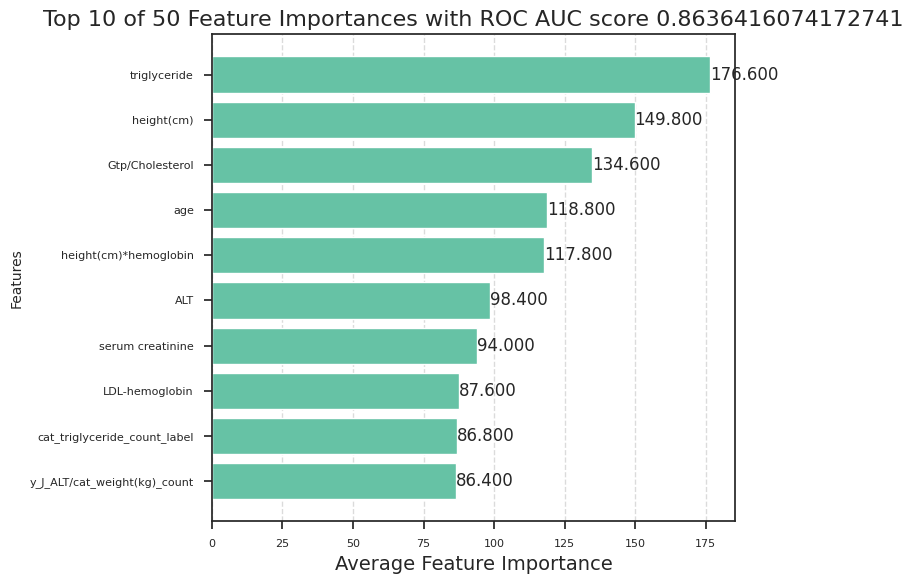

In [20]:
n_imp_features_cat=get_most_important_features(X_train.reset_index(drop=True), y_train,50, 'cat')
n_imp_features_xgb=get_most_important_features(X_train.reset_index(drop=True), y_train,50, 'xgb')
n_imp_features_lgbm=get_most_important_features(X_train.reset_index(drop=True), y_train,50, 'lgbm')

In [21]:
n_imp_features=[*set(n_imp_features_xgb+n_imp_features_lgbm)]#n_imp_features_cat
print(f"{len(n_imp_features)} features have been selected from three algorithms for the final model")

68 features have been selected from three algorithms for the final model


In [22]:
X_train=X_train[n_imp_features]
X_test=X_test[n_imp_features]

# MODELING

## Class Weights

In [23]:
classes = np.unique(y_train)  
class_to_index = {cls: idx for idx, cls in enumerate(classes)}
y_train_numeric = np.array([class_to_index[cls] for cls in y_train])

class_counts = np.bincount(y_train_numeric)

total_samples = len(y_train_numeric)

class_weights = total_samples / (len(classes) * class_counts)

class_weights_dict = {cls: weight for cls, weight in zip(classes, class_weights)}

print("Class counts:", class_counts)
print("Total samples:", total_samples)
print("Class weights:", class_weights)
print("Class weights dictionary:", class_weights_dict)

Class counts: [114269  83971]
Total samples: 198240
Class weights: [0.86742686 1.18040752]
Class weights dictionary: {0: 0.8674268611784474, 1: 1.1804075216443772}


## Models

In [24]:
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [25]:
sgd=tensorflow.keras.optimizers.SGD(learning_rate=0.01, momentum=0.5, nesterov=True)
rms = tensorflow.keras.optimizers.RMSprop()
nadam=tensorflow.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adam"
)
lrelu = lambda x: tensorflow.keras.activations.relu(x, alpha=0.1)

In [26]:
ann = Sequential()
ann.add(Dense(64, input_dim=X_train.shape[1], kernel_initializer='he_uniform', activation=lrelu))
ann.add(Dropout(0.1))
ann.add(Dense(16,  kernel_initializer='he_uniform', activation=lrelu))
ann.add(Dropout(0.1))
ann.add(Dense(4,  kernel_initializer='he_uniform', activation='relu'))
ann.add(Dropout(0.1))

ann.add(Dense(1,  kernel_initializer='he_uniform', activation='sigmoid'))
ann.compile(loss="binary_crossentropy", optimizer=sgd,metrics=['accuracy'])

In [27]:
class Splitter:
    def __init__(self, test_size=0.2, kfold=True, n_splits=5):
        self.test_size = test_size
        self.kfold = kfold
        self.n_splits = n_splits

    def split_data(self, X, y, random_state_list):
        if self.kfold:
            for random_state in random_state_list:
                kf = KFold(n_splits=self.n_splits, random_state=random_state, shuffle=True)
                for train_index, val_index in kf.split(X, y):
                    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
                    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
                    yield X_train, X_val, y_train, y_val

class Classifier:
    def __init__(self, n_estimators=100, device="gpu", random_state=0):
        self.n_estimators = n_estimators
        self.device = device
        self.random_state = random_state
        self.models = self._define_model()
        self.len_models = len(self.models)
        
    def _define_model(self):
        xgb_params = {
            'n_estimators': self.n_estimators,
            'learning_rate': 0.155,
            'max_depth': 4,
            'subsample': 0.8,
            'colsample_bytree': 0.1,
            'n_jobs': -1,
            'eval_metric': 'logloss',
            'objective': 'binary:logistic',
            'tree_method': 'hist',
            'verbosity': 0,
            'random_state': self.random_state,
#             'class_weight':class_weights_dict,
        }
        if self.device == 'gpu':
            xgb_params['tree_method'] = 'gpu_hist'
            xgb_params['predictor'] = 'gpu_predictor'
            
        xgb_params2=xgb_params.copy() 
        xgb_params2['subsample']= 0.3
        xgb_params2['max_depth']=8
        xgb_params2['learning_rate']=0.005
        xgb_params2['colsample_bytree']=0.9

        xgb_params3=xgb_params.copy() 
        xgb_params3['subsample']= 0.6
        xgb_params3['max_depth']=6
        xgb_params3['learning_rate']=0.0125
        xgb_params3['colsample_bytree']=0.7      
        
        lgb_params = {
            'n_estimators': self.n_estimators,
            'max_depth': 8,
            'learning_rate': 0.0125,
            'subsample': 0.20,
            'colsample_bytree': 0.56,
            'reg_alpha': 0.25,
            'reg_lambda': 5e-08,
            'objective': 'binary',
            'boosting_type': 'gbdt',
            'device': self.device,
            'random_state': self.random_state,
        }
        lgb_params2 = {
            'n_estimators': self.n_estimators,
            'max_depth': 6,
            'learning_rate': 0.0375,
            'subsample': 0.20,
            'colsample_bytree': 0.56,
            'reg_alpha': 0.25,
            'reg_lambda': 5e-08,
            'objective': 'binary',
            'boosting_type': 'gbdt',
            'device': self.device,
            'random_state': self.random_state,
        }
        lgb_params3=lgb_params.copy()  
        lgb_params3['subsample']=0.9
        lgb_params3['reg_lambda']=0.3461495211744402
        lgb_params3['reg_alpha']=0.3095626288582237
        lgb_params3['max_depth']=8
        lgb_params3['learning_rate']=0.0075
        lgb_params3['colsample_bytree']=0.5

        lgb_params4=lgb_params2.copy()  
        lgb_params4['subsample']=0.7
        lgb_params4['reg_lambda']=0.1
        lgb_params4['reg_alpha']=0.2
        lgb_params4['max_depth']=10
        lgb_params4['learning_rate']=0.00375
        lgb_params4['colsample_bytree']=0.5
        cb_params = {
            'iterations': self.n_estimators,
            'depth': 6,
            'learning_rate' : 0.0075,
            'l2_leaf_reg': 0.7,
            'random_strength': 0.2,
            'max_bin': 200,
            'od_wait': 65,
            'one_hot_max_size': 120,
            'grow_policy': 'Depthwise',
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'AUC',
            'loss_function': 'Logloss',
            'task_type': self.device.upper(),
            'random_state': self.random_state,
        }
        cb_sym_params = cb_params.copy()
        cb_sym_params['grow_policy'] = 'SymmetricTree'
        cb_loss_params = cb_params.copy()
        cb_loss_params['grow_policy'] = 'Lossguide'
        
        cb_params2=  cb_params.copy()
        cb_params2['learning_rate']=0.075
        cb_params2['depth']=8
        
        cb_params3={
            'iterations': self.n_estimators,
            'random_strength': 0.1, 
            'one_hot_max_size': 70, 
            'max_bin': 100, 
            'learning_rate': 0.0065, 
            'l2_leaf_reg': 0.3, 
            'grow_policy': 'Depthwise', 
            'depth': 10, 
            'max_bin': 200,
            'od_wait': 65,
            'bootstrap_type': 'Bayesian',
            'od_type': 'Iter',
            'eval_metric': 'AUC',
            'loss_function': 'Logloss',
            'task_type': self.device.upper(),
            'random_state': self.random_state,
        }
        cb_params4=  cb_params.copy()
        cb_params4['learning_rate']=0.01
        cb_params4['depth']=12
        dt_params= {'min_samples_split': 30, 'min_samples_leaf': 10, 'max_depth': 8, 'criterion': 'gini'}
        
        models = {
            'xgb': xgb.XGBClassifier(**xgb_params),
            'xgb2': xgb.XGBClassifier(**xgb_params2),
            'xgb3': xgb.XGBClassifier(**xgb_params3),
            'lgb': lgb.LGBMClassifier(**lgb_params),
            'lgb2': lgb.LGBMClassifier(**lgb_params2),
            'lgb3': lgb.LGBMClassifier(**lgb_params3),
            #'lgb4': lgb.LGBMClassifier(**lgb_params4),
            'cat': CatBoostClassifier(**cb_params),
            'cat2': CatBoostClassifier(**cb_params2),
            'cat3': CatBoostClassifier(**cb_params2),
            #'cat4': CatBoostClassifier(**cb_params2),
            "cat_sym": CatBoostClassifier(**cb_sym_params),
            "cat_loss": CatBoostClassifier(**cb_loss_params),
            'hist_gbm' : HistGradientBoostingClassifier (max_iter=300, learning_rate=0.001,  max_leaf_nodes=80,
                                                          max_depth=6,random_state=self.random_state),
            'lr': LogisticRegression(),
            'dt' :DecisionTreeClassifier(**dt_params,random_state=self.random_state)                                   
        }
        return models

## Optimize Tuning Ensemble Weights

In [28]:
class OptunaWeights:
    def __init__(self, random_state, n_trials=3000):
        self.study = None
        self.weights = None
        self.random_state = random_state
        self.n_trials = n_trials

    def _objective(self, trial, y_true, y_preds):
        weights = [trial.suggest_float(f"weight{n}", -1, 3) for n in range(len(y_preds))]
        
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=weights)

        auc_score = roc_auc_score(y_true, weighted_pred)
        log_loss_score=log_loss(y_true, weighted_pred)
        return auc_score

    def fit(self, y_true, y_preds):
        optuna.logging.set_verbosity(optuna.logging.ERROR)
        sampler = optuna.samplers.CmaEsSampler(seed=self.random_state)
        pruner = optuna.pruners.HyperbandPruner()
        self.study = optuna.create_study(sampler=sampler, pruner=pruner, study_name="OptunaWeights", direction='maximize')
        objective_partial = partial(self._objective, y_true=y_true, y_preds=y_preds)
        self.study.optimize(objective_partial, n_trials=self.n_trials)
        self.weights = [self.study.best_params[f"weight{n}"] for n in range(len(y_preds))]

    def predict(self, y_preds):
        assert self.weights is not None, 'OptunaWeights error, must be fitted before predict'
        weighted_pred = np.average(np.array(y_preds).T, axis=1, weights=self.weights)
        return weighted_pred

    def fit_predict(self, y_true, y_preds):
        self.fit(y_true, y_preds)
        return self.predict(y_preds)
    
    def weights(self):
        return self.weights

## Model Fit

In [29]:
kfold = True
n_splits = 1 if not kfold else 5
random_state = 2023
random_state_list = [42]
n_estimators = 9999
early_stopping_rounds = 300
verbose = False

splitter = Splitter(kfold=kfold, n_splits=n_splits)

test_predss = np.zeros(X_test.shape[0])
ensemble_score = []
weights = []
trained_models = {'xgb':[], 'lgb':[], 'cat':[]}

    
for i, (X_train_, X_val, y_train_, y_val) in enumerate(splitter.split_data(X_train, y_train, random_state_list=random_state_list)):
    n = i % n_splits
    m = i // n_splits
            
    
    classifier = Classifier(n_estimators, device, random_state)
    models = classifier.models
    
    
    oof_preds = []
    test_preds = []
    
   
    for name, model in models.items():
        if ('cat' in name) or ("lgb" in name) or ("xgb" in name):
            if 'lgb' == name: 
                model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)],
                          early_stopping_rounds=early_stopping_rounds, verbose=verbose)
            elif 'cat' == name:
                model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)],
                          early_stopping_rounds=early_stopping_rounds, verbose=verbose)
            else:
                model.fit(X_train_, y_train_, eval_set=[(X_val, y_val)], early_stopping_rounds=early_stopping_rounds, verbose=verbose)
        elif name in 'ann':
            model.fit(X_train_, y_train_, validation_data=(X_val, y_val),batch_size=4, epochs=5,verbose=verbose)
        else:
            model.fit(X_train_, y_train_)
        
        if name in 'ann':
            test_pred = np.array(model.predict(X_test))[:, 0]
            y_val_pred = np.array(model.predict(X_val))[:, 0]
        else:
            test_pred = model.predict_proba(X_test)[:, 1]
            y_val_pred = model.predict_proba(X_val)[:, 1]

        score = roc_auc_score(y_val, y_val_pred)
        
        print(f'{name} [FOLD-{n} SEED-{random_state_list[m]}] ROC AUC score: {score:.5f}')
        
        oof_preds.append(y_val_pred)
        test_preds.append(test_pred)
        
        if name in trained_models.keys():
            trained_models[f'{name}'].append(deepcopy(model))
    
    optweights = OptunaWeights(random_state=random_state)
    y_val_pred = optweights.fit_predict(y_val.values, oof_preds)
    
    score = roc_auc_score(y_val, y_val_pred)
    print(f'Ensemble [FOLD-{n} SEED-{random_state_list[m]}] ------------------>  ROC AUC score {score:.5f}')
    ensemble_score.append(score)
    weights.append(optweights.weights)
    
    test_predss += optweights.predict(test_preds) / (n_splits * len(random_state_list))
    
    gc.collect()

xgb [FOLD-0 SEED-42] ROC AUC score: 0.86796
xgb2 [FOLD-0 SEED-42] ROC AUC score: 0.87095
xgb3 [FOLD-0 SEED-42] ROC AUC score: 0.87115
lgb [FOLD-0 SEED-42] ROC AUC score: 0.87031
lgb2 [FOLD-0 SEED-42] ROC AUC score: 0.87046
lgb3 [FOLD-0 SEED-42] ROC AUC score: 0.86939
cat [FOLD-0 SEED-42] ROC AUC score: 0.87041
cat2 [FOLD-0 SEED-42] ROC AUC score: 0.87073
cat3 [FOLD-0 SEED-42] ROC AUC score: 0.87073
cat_sym [FOLD-0 SEED-42] ROC AUC score: 0.86563
cat_loss [FOLD-0 SEED-42] ROC AUC score: 0.86817
hist_gbm [FOLD-0 SEED-42] ROC AUC score: 0.83921
lr [FOLD-0 SEED-42] ROC AUC score: 0.84225
dt [FOLD-0 SEED-42] ROC AUC score: 0.83208
Ensemble [FOLD-0 SEED-42] ------------------>  ROC AUC score 0.87445
xgb [FOLD-1 SEED-42] ROC AUC score: 0.87266
xgb2 [FOLD-1 SEED-42] ROC AUC score: 0.87658
xgb3 [FOLD-1 SEED-42] ROC AUC score: 0.87752
lgb [FOLD-1 SEED-42] ROC AUC score: 0.87572
lgb2 [FOLD-1 SEED-42] ROC AUC score: 0.87640
lgb3 [FOLD-1 SEED-42] ROC AUC score: 0.87398
cat [FOLD-1 SEED-42] ROC AUC 

In [30]:
mean_score = np.mean(ensemble_score)
std_score = np.std(ensemble_score)
print(f'Ensemble ROC AUC score {mean_score:.5f} ± {std_score:.5f}')

print('--- Model Weights ---')
mean_weights = np.mean(weights, axis=0)
std_weights = np.std(weights, axis=0)
for name, mean_weight, std_weight in zip(models.keys(), mean_weights, std_weights):
    print(f'{name}: {mean_weight:.5f} ± {std_weight:.5f}')

Ensemble ROC AUC score 0.87792 ± 0.00197
--- Model Weights ---
xgb: 0.45821 ± 0.13368
xgb2: 0.14293 ± 0.04470
xgb3: 0.24959 ± 0.20456
lgb: 0.48337 ± 0.16889
lgb2: 0.32931 ± 0.08699
lgb3: -0.01453 ± 0.28209
cat: 1.02184 ± 0.28244
cat2: 0.31011 ± 0.49029
cat3: 0.35723 ± 0.54597
cat_sym: -0.19497 ± 0.20628
cat_loss: -0.98288 ± 0.00546
hist_gbm: 0.07990 ± 0.21228
lr: -0.00612 ± 0.03332
dt: -0.02911 ± 0.06077


## Feature Importance Visualization

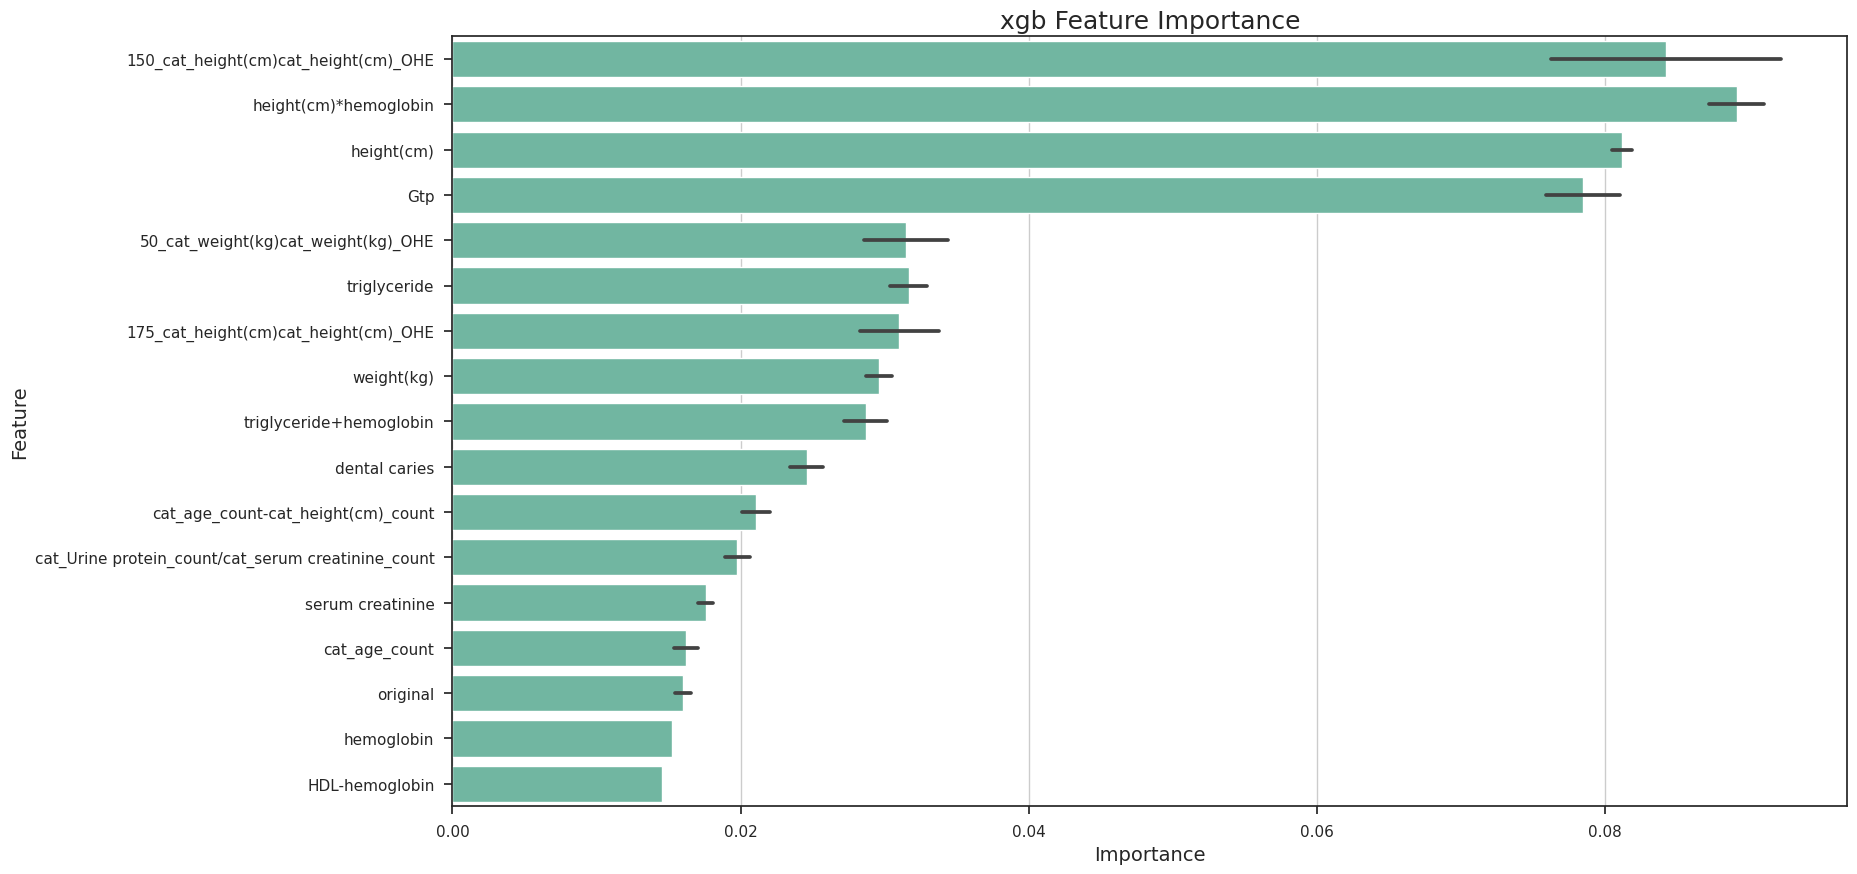

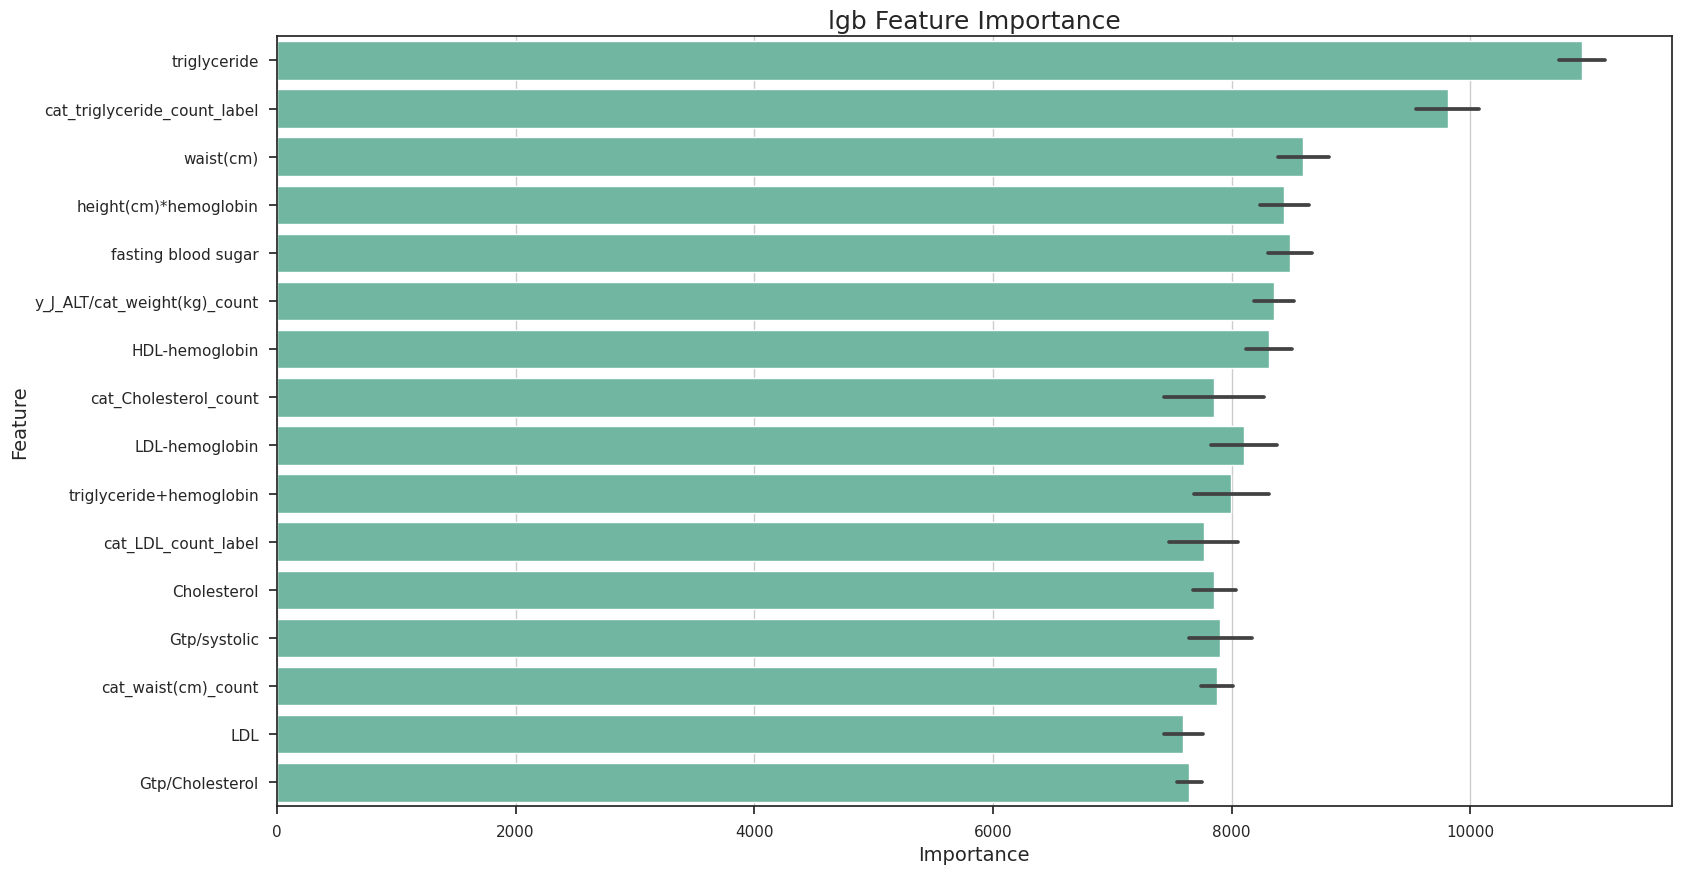

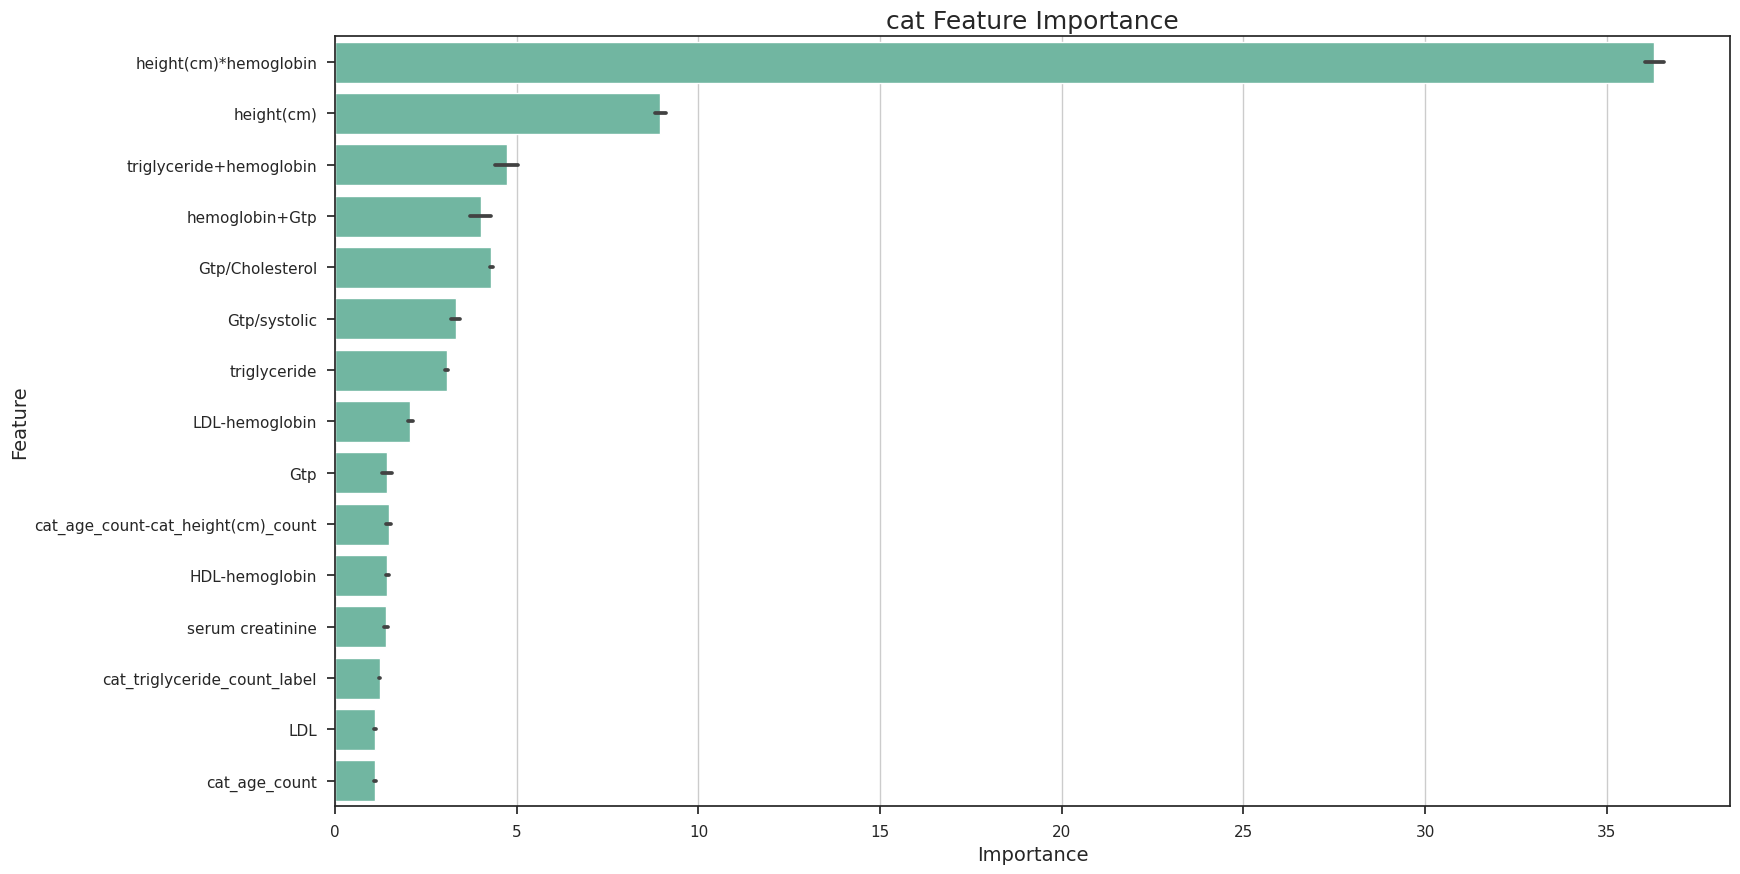

In [31]:
def visualize_importance(models, feature_cols, title, head=15):
    importances = []
    feature_importance = pd.DataFrame()
    for i, model in enumerate(models):
        _df = pd.DataFrame()
        _df["importance"] = model.feature_importances_
        _df["feature"] = pd.Series(feature_cols)
        _df["fold"] = i
        _df = _df.sort_values('importance', ascending=False)
        _df = _df.head(head)
        feature_importance = pd.concat([feature_importance, _df], axis=0, ignore_index=True)
        
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    plt.figure(figsize=(18, 10))
    sns.barplot(x='importance', y='feature', data=feature_importance, color= (0.4, 0.76, 0.65), errorbar='sd')
    plt.xlabel('Importance', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.title(f'{title} Feature Importance', fontsize=18)
    plt.grid(True, axis='x')
    plt.show()
    
for name, models in trained_models.items():
    visualize_importance(models, list(X_train.columns), name)

## Submission

In [32]:
sub = pd.read_csv('/kaggle/input/playground-series-s3e24/sample_submission.csv')
sub['smoking'] =  test_predss
sub.to_csv('submission_pure.csv',index=False)
sub.head()

id   smoking
0  159256  0.658514
1  159257  0.079251
2  159258  0.446594
3  159259  0.009947
4  159260  0.710591

In [33]:
sub1=pd.read_csv("/kaggle/input/pg-s3e24-brute-force-and-ignorance/submission.csv")
sub2=pd.read_csv("/kaggle/input/efficient-prediction-of-smoker-status/xgb_pseudo_opt_submission.csv")
sub3=pd.read_csv("/kaggle/input/pg-s3-e24-eda-modeling-ensemle-nn/nn_submission.csv")

def scale(df):
    df['smoking']=(df['smoking']-df['smoking'].min())/(df['smoking'].max()-df['smoking'].min())
    return df

sub_combined=sub1.copy()

sub1=scale(sub1)
sub2=scale(sub2)
sub3=scale(sub3)
sub=scale(sub)

sub_combined['smoking']=(3*sub1['smoking'] + sub2['smoking'] +sub["smoking"])/5

sub_combined.to_csv('submission.csv',index=False)